In [1]:
import numpy as np
from nptyping import NDArray
import random
import numpy.linalg as LA
import matplotlib.pyplot as plt
from typing import List, Set, Dict, Tuple, Optional, Any, Callable
from PIL import Image
import os
import json

In [2]:
from utils import load_image_to_arr, display_rgb, SVD2D
import dim_reduction
from spectral_data import ImageSpectralData
dim_reduction.init_basis_cache()
import cityscapes_helper
from dataset_creation import (
    MultiScaleImageSampler, 
    ImageChunkSummarizerOptions, 
    MultiScaleImageEncoder, 
    MultiScaleImageDecoder, 
    ImageAtScale, 
    CityscapesDatasetFactory, 
    CityScapesDataset
)

In [3]:
# Ben Desptop
#cityscapes_helper.set_visual_data_zip_path("C:\\Users\\Ben\\Downloads\\leftImg8bit_trainvaltest.zip")
#cityscapes_helper.set_semantic_data_zip_path("C:\\Users\\Ben\\Downloads\\gtFine_trainvaltest.zip")
# Ben Laptop (via WSL)
cityscapes_helper.set_visual_data_zip_path("/mnt/c/Users/benki/Downloads/leftImg8bit_trainvaltest.zip")
cityscapes_helper.set_semantic_data_zip_path("/mnt/c/Users/benki/Downloads/gtFine_trainvaltest.zip")

cityscapes_helper.initialize_tool()

In [4]:
s = [240, 96, 32]

whole_img_options = ImageChunkSummarizerOptions()
whole_img_options.downsample_factor = 8
whole_img_options.n_pcm_coeffs = [80, 40, 30]

opt_240 = ImageChunkSummarizerOptions()
opt_240.downsample_factor = 3
opt_240.n_pcm_coeffs = [120, 40, 20]

opt_96 = ImageChunkSummarizerOptions()
opt_96.downsample_factor = 2
opt_96.n_pcm_coeffs = [120, 40, 20]

opt_32 = ImageChunkSummarizerOptions()
opt_32.n_pcm_coeffs = [60, 20, 15]

chunk_summarizer_options = [opt_240, opt_96, opt_32]
fact = CityscapesDatasetFactory("full_dataset_v1_30000", s, chunk_summarizer_options, whole_img_options)
comp = fact.create_dataset(30000)
comp

processed batch 1 of 600
processed batch 2 of 600
processed batch 3 of 600
processed batch 4 of 600
processed batch 5 of 600
processed batch 6 of 600
processed batch 7 of 600
processed batch 8 of 600
processed batch 9 of 600
processed batch 10 of 600
processed batch 11 of 600
processed batch 12 of 600
processed batch 13 of 600
processed batch 14 of 600
processed batch 15 of 600
processed batch 16 of 600
processed batch 17 of 600
processed batch 18 of 600
processed batch 19 of 600
processed batch 20 of 600
processed batch 21 of 600
processed batch 22 of 600
processed batch 23 of 600
processed batch 24 of 600
processed batch 25 of 600
processed batch 26 of 600
processed batch 27 of 600
processed batch 28 of 600
processed batch 29 of 600
processed batch 30 of 600
processed batch 31 of 600
processed batch 32 of 600
processed batch 33 of 600
processed batch 34 of 600
processed batch 35 of 600
processed batch 36 of 600
processed batch 37 of 600
processed batch 38 of 600
processed batch 39 of

In [5]:
fact.persist_dataset()

In [4]:
D = CityScapesDataset("full_dataset_v1_30000")
D.load()

0.npy,1.npy,2.npy,3.npy,4.npy,5.npy,6.npy,


/home/benthehuman/school/vision/UW-Vision-Segmentation/dataset_creation.py:681: RuntimeWarning: invalid value encountered in true_divide
  feature_01 = (features - self.raw_feature_min) / feature_range


<ipython-input-25-1ffb715739de>:8: RuntimeWarning: invalid value encountered in true_divide
  feature_01 = (features - feature_min) / feature_range


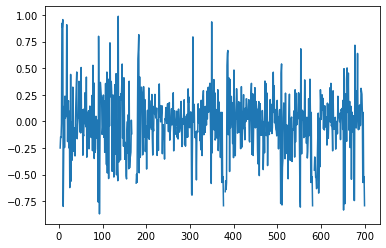

In [25]:
D.features.shape
features = D.features
feature_mean  = np.mean(D.features, axis=0)
feature_min = np.min(D.features, axis=0)
feature_max = np.max(D.features, axis=0)
feature_range = feature_max - feature_min

feature_01 = (features - feature_min) / feature_range
feature_neg1_to_1 = (feature_01 - 0.5) * 2

fig, ax = plt.subplots()
#ax.set_ylim((0, 30))
ax.plot(feature_neg1_to_1[100])

(30000, 30)
(30000, 701)
(701,)


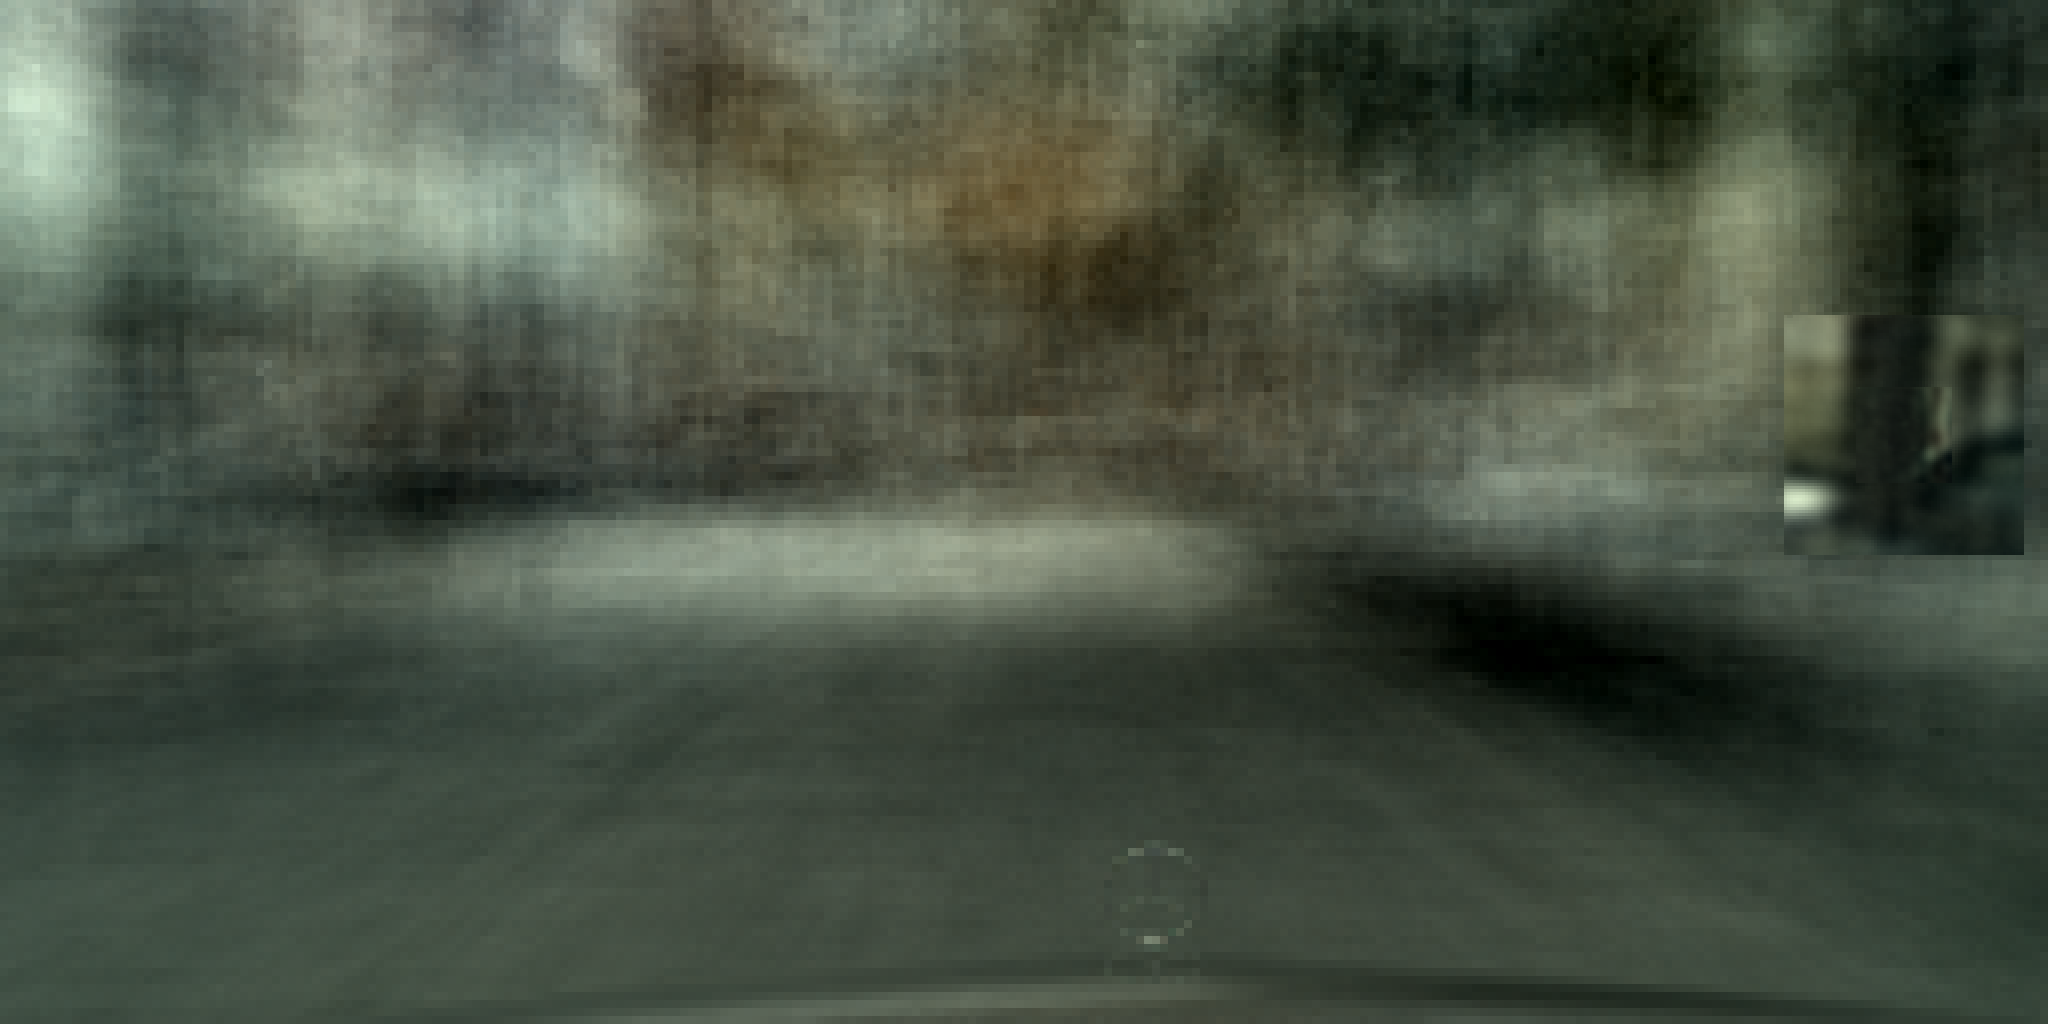

In [13]:
print(D.labels.shape)
print(D.features.shape)
print(D.features[0].shape)
i = random.randint(0, 29000)
DDII = D.get_decoded_feature(i)
DD_OG = D.get_feature_original_image(i)
Image.fromarray(DDII)

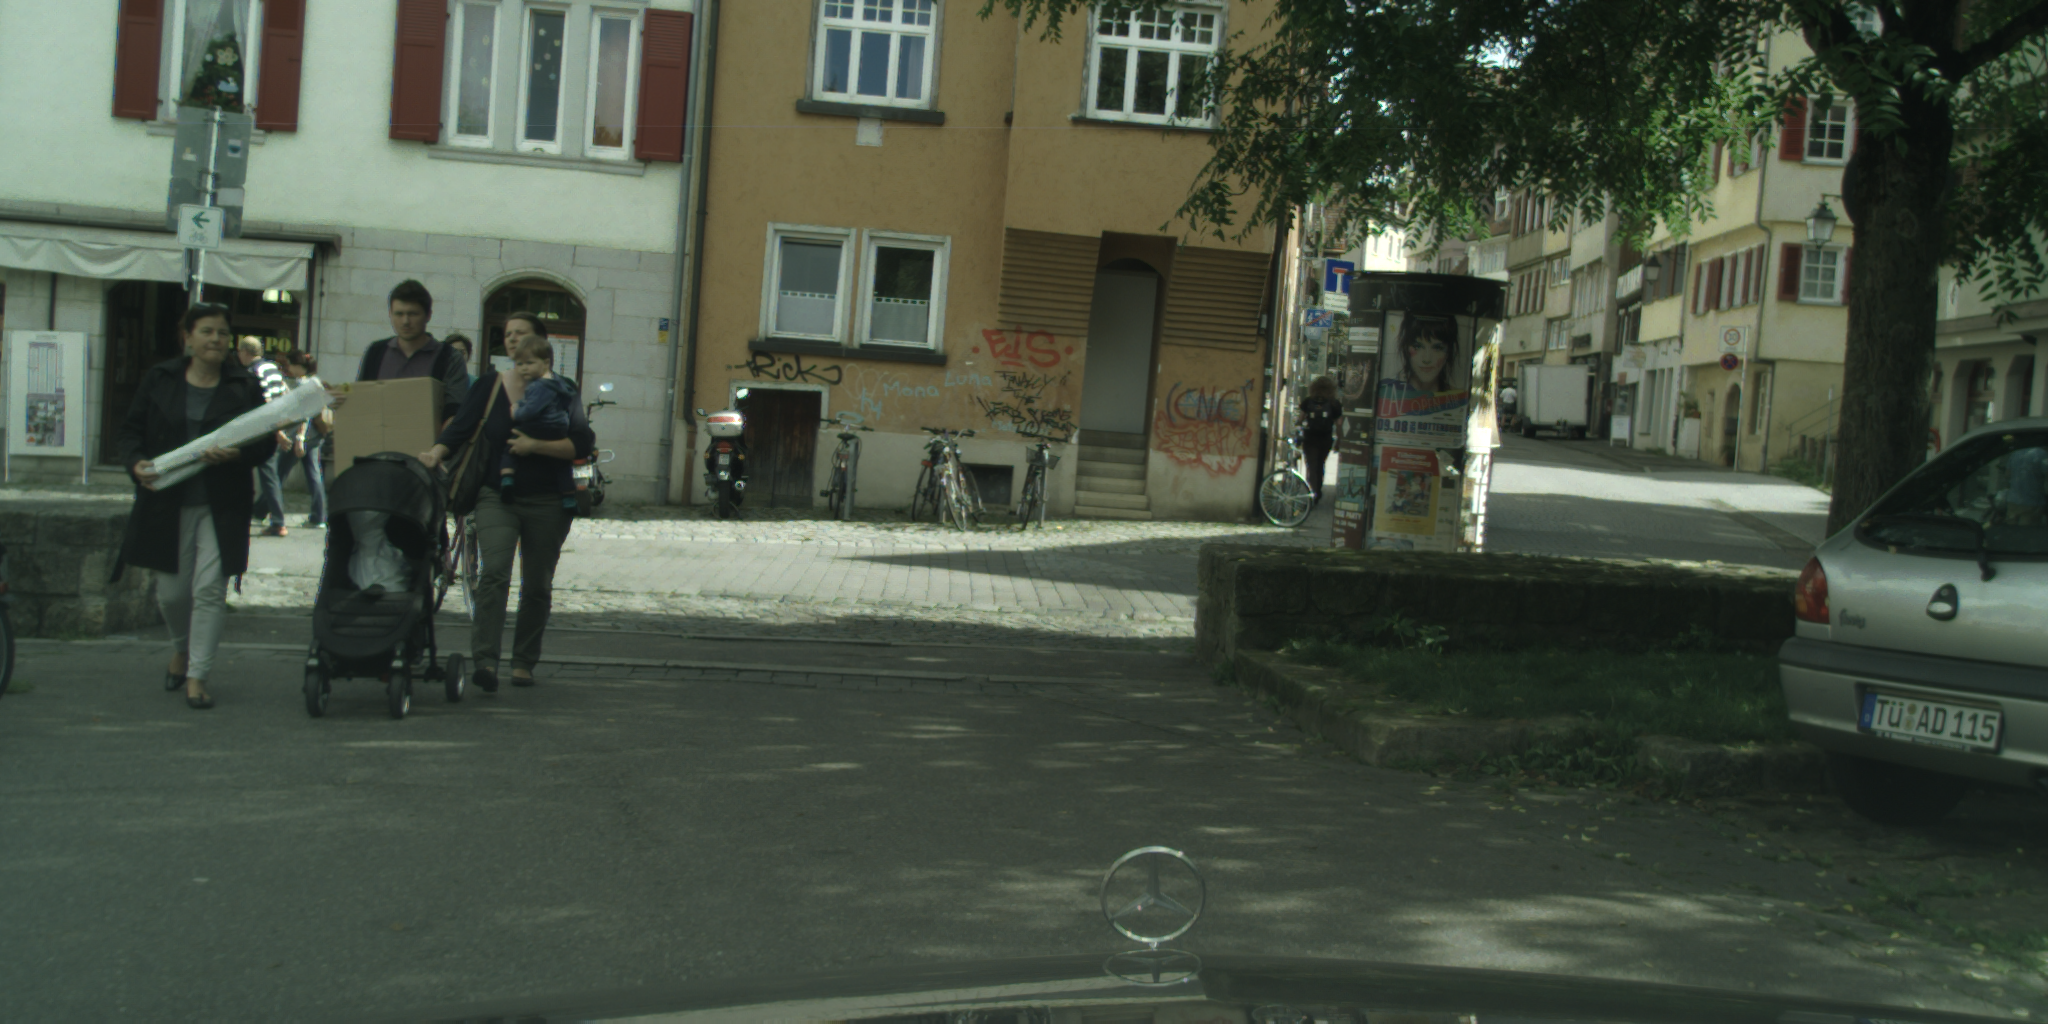

In [14]:
Image.fromarray(DD_OG)

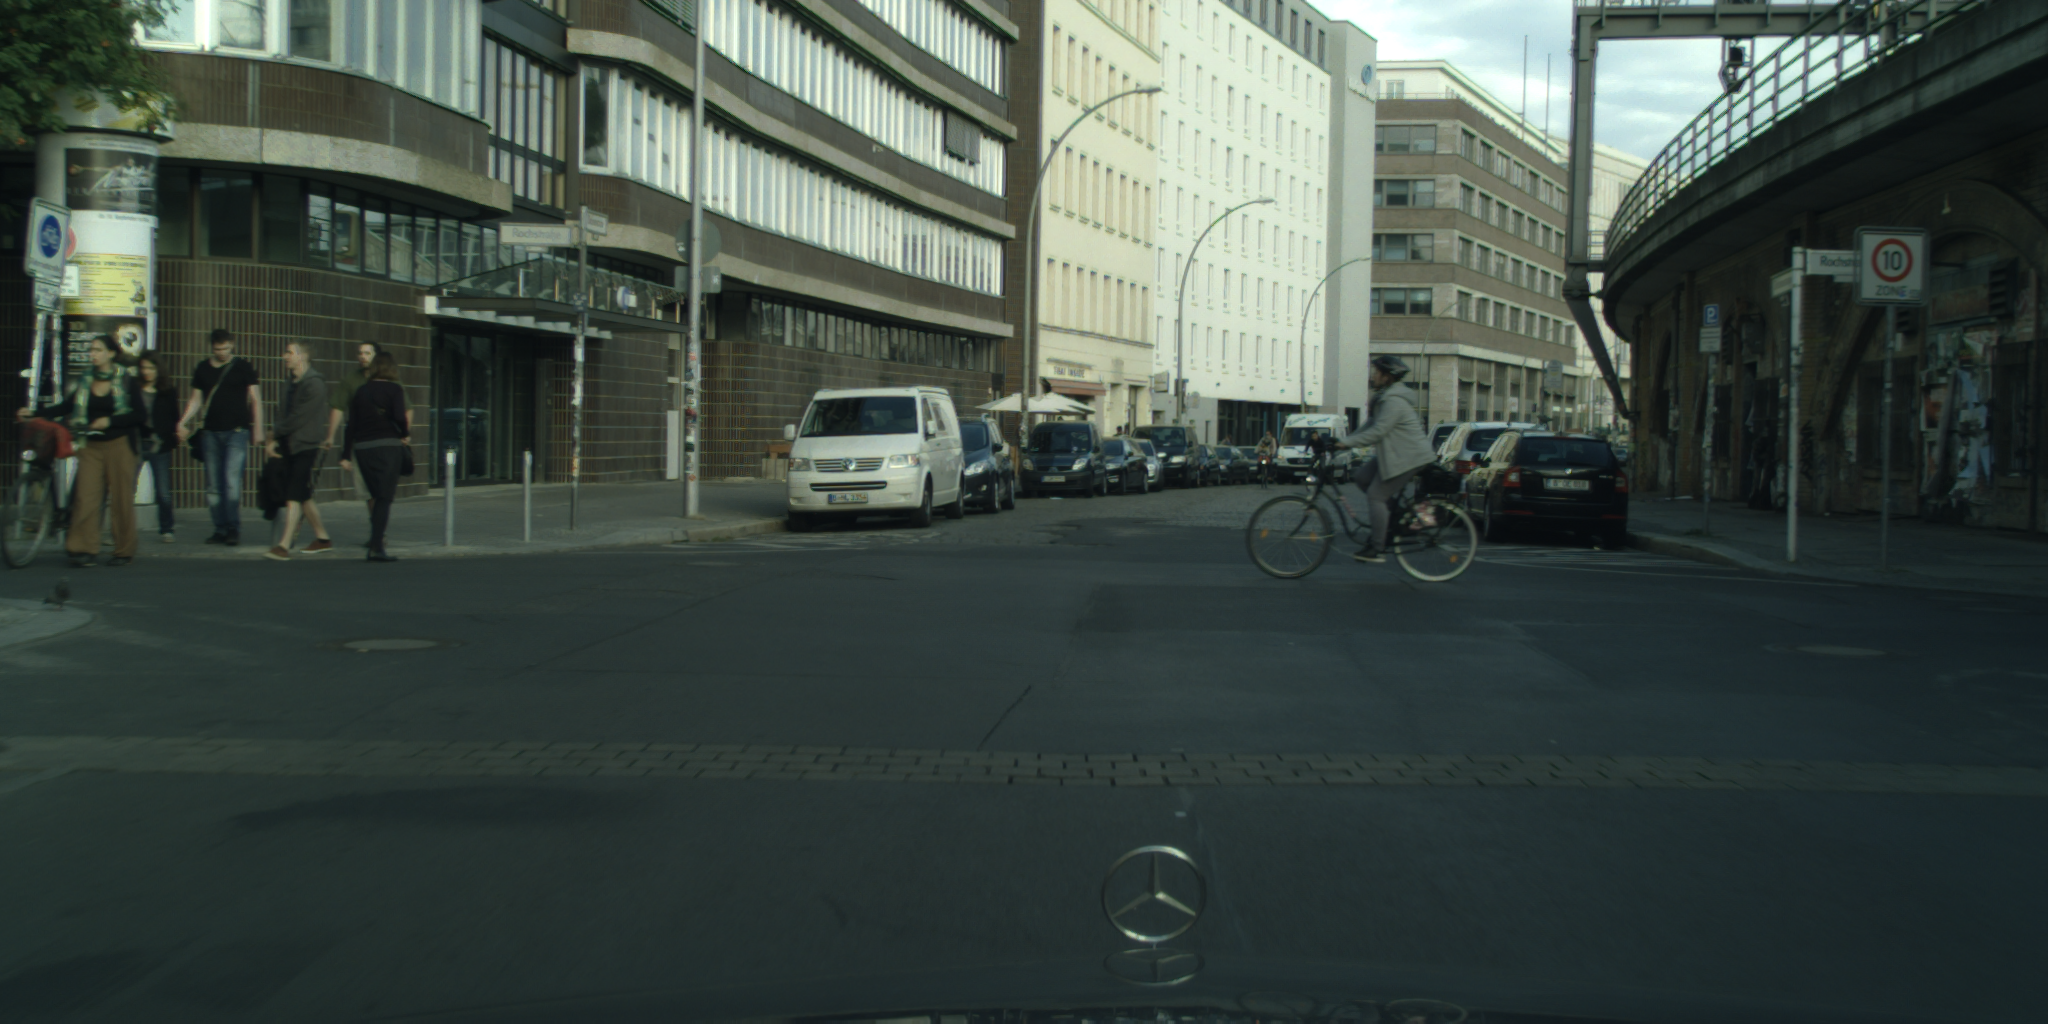

In [4]:
sceneID, img = cityscapes_helper.loadRandomVisualInfo()
Image.fromarray(img)

[ 2.08000000e+02  3.04168131e+01  3.86710429e+01  3.60327062e+01
  5.44885948e+03  5.40826369e-01  6.39306278e-01  5.46620820e-01
  6.73847997e-02  9.14127804e-02 -1.83853668e-01  1.50547485e-01
  5.53449473e-02 -1.79073221e-01 -7.85931091e-02  9.16111341e-03
 -8.09936746e-02 -1.45890958e-01  2.13853428e-02 -6.96288308e-02
  1.11939671e-01  1.12449472e-01 -2.80400453e-02  1.56926893e-01
  5.50204280e-04  3.52638823e-03 -1.90102695e-01  4.73479689e-02
 -5.76622480e-02  9.08141333e-02 -6.27384151e-02  3.47301562e-02
 -2.09559032e-01  3.30167756e-02  9.30179720e-02  9.36722163e-03
 -3.69210818e-02  1.32010747e-01  1.87734025e-02 -9.64930368e-02
 -1.14601175e-01  2.33913867e-02  8.22596763e-02  1.28006138e-02
  9.34523414e-02 -3.53654950e-02  1.52994997e-02  1.34089917e-01
  1.52144881e-01  2.72536830e-03 -8.83921110e-02 -8.85665383e-02
  4.66086224e-02  2.18362039e-02 -4.39683218e-03 -2.63536740e-02
 -3.56074159e-02  4.14490883e-02  1.35054878e-03  1.20556077e-03
  1.14556228e-02 -3.55107

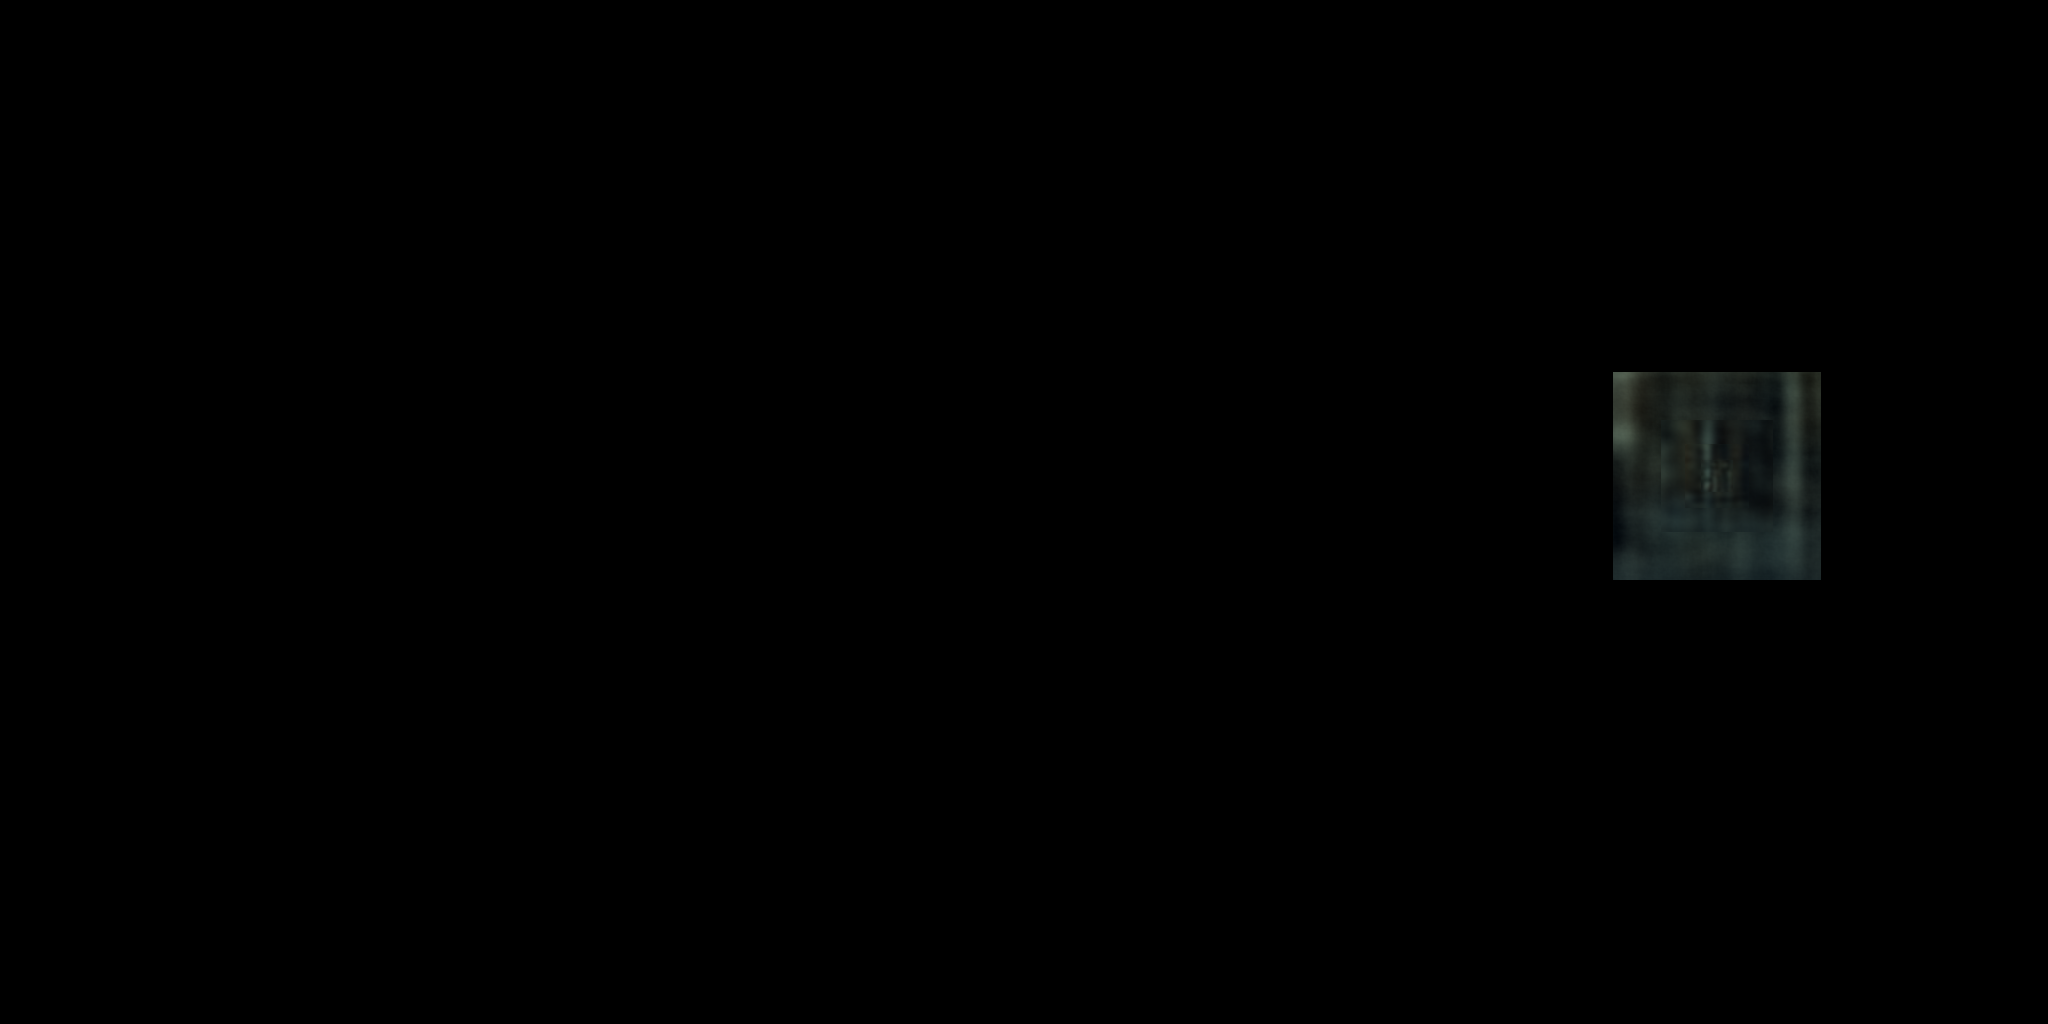

In [86]:

#sampler = MultiScaleImageSampler([208, 112, 64, 32])
#scales = sampler.sample(img)
#scales2 = sampler.sample(img)
chunk_summarizer_options = [ImageChunkSummarizerOptions(), ImageChunkSummarizerOptions(), ImageChunkSummarizerOptions(), ImageChunkSummarizerOptions()]
multi_chunk_encoder = MultiScaleImageEncoder(chunk_summarizer_options)
S = multi_chunk_encoder.encode([
    [scales[0], scales2[0]],
    [scales[1], scales2[1]],
    [scales[2], scales2[2]],
    [scales[3], scales2[3]]
])
print(S[1])
scale_msk = multi_chunk_encoder.scale_masks
feature_masks = [enc.feature_masks for enc in multi_chunk_encoder.encoders]
multi_chunk_decoder = MultiScaleImageDecoder(scale_msk, feature_masks)
II = multi_chunk_decoder.decode(S[1])
im = Image.fromarray(II)
im

{'size1D': array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, Fal

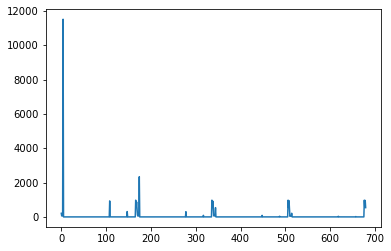

In [23]:
fig, ax = plt.subplots()
ax.plot(S[0])
feature_masks[0]

In [18]:
BV = dim_reduction.get_basis(32).basis_vectors
def show_basis(basis_vectors, offset):
    fig, axes = plt.subplots(1, 8, figsize=(12, 3))
    for i in range(8):
        axes[i].imshow(basis_vectors[offset + i].reshape((32, 32)))

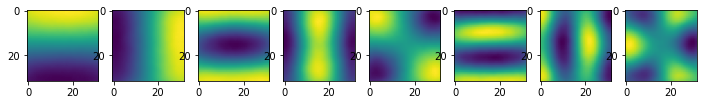

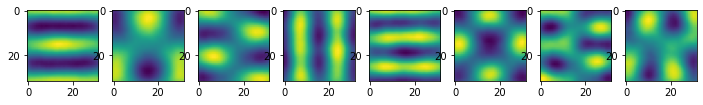

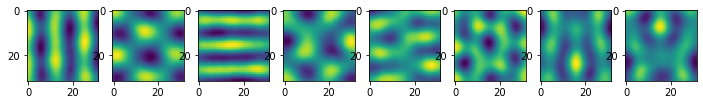

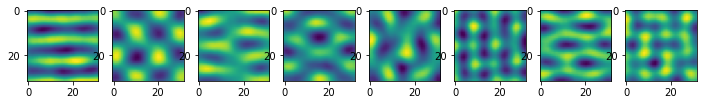

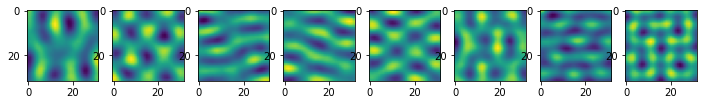

In [20]:
show_basis(BV, 0)
show_basis(BV, 8)
show_basis(BV, 16)
show_basis(BV, 24)
show_basis(BV, 32)

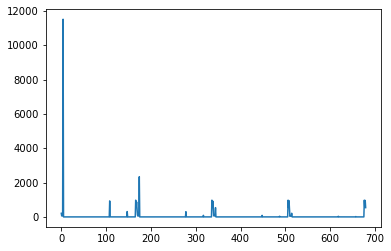

In [22]:
fig, ax = plt.subplots()
ax.plot(S[0])

In [6]:
import numpy as np
E_full = np.array([
    [1, 2, 3],
    [1, 2, 3]
])

E_part = [
    np.array([5, 5, 5]),
    np.array([6, 6, 6])
]

np.vstack([None, E_part])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 3

In [33]:
np.arctan(1/0.000000001)

1.5707963257948967

In [9]:
s = [240, 96, 32]

whole_img_options = ImageChunkSummarizerOptions()
whole_img_options.downsample_factor = 8
whole_img_options.n_pcm_coeffs = [80, 40, 30]

opt_240 = ImageChunkSummarizerOptions()
opt_240.downsample_factor = 3
opt_240.n_pcm_coeffs = [120, 40, 20]

opt_96 = ImageChunkSummarizerOptions()
opt_96.downsample_factor = 2
opt_96.n_pcm_coeffs = [120, 40, 20]

opt_32 = ImageChunkSummarizerOptions()
opt_32.n_pcm_coeffs = [60, 20, 15]

chunk_summarizer_options = [opt_240, opt_96, opt_32]
fact = CityscapesDatasetFactory("full_dataset_v1_120000", s, chunk_summarizer_options, whole_img_options)
comp = fact.create_dataset(120000)
comp

processed batch 1 of 2400
processed batch 2 of 2400
processed batch 3 of 2400
processed batch 4 of 2400
processed batch 5 of 2400
processed batch 6 of 2400
processed batch 7 of 2400
processed batch 8 of 2400
processed batch 9 of 2400
processed batch 10 of 2400
processed batch 11 of 2400
processed batch 12 of 2400
processed batch 13 of 2400
processed batch 14 of 2400
processed batch 15 of 2400
processed batch 16 of 2400
processed batch 17 of 2400
processed batch 18 of 2400
processed batch 19 of 2400
processed batch 20 of 2400
processed batch 21 of 2400
processed batch 22 of 2400
processed batch 23 of 2400
processed batch 24 of 2400
processed batch 25 of 2400
processed batch 26 of 2400
processed batch 27 of 2400
processed batch 28 of 2400
processed batch 29 of 2400
processed batch 30 of 2400
processed batch 31 of 2400
processed batch 32 of 2400
processed batch 33 of 2400
processed batch 34 of 2400
processed batch 35 of 2400
processed batch 36 of 2400
processed batch 37 of 2400
processed 

In [6]:
fact.persist_dataset()

In [7]:
D = CityScapesDataset("full_dataset_v1_300")
D.load()

0.npy,


/home/benthehuman/school/vision/UW-Vision-Segmentation/dataset_creation.py:681: RuntimeWarning: invalid value encountered in true_divide
  feature_01 = (features - self.raw_feature_min) / feature_range


In [8]:
D.features.shape

(300, 701)

In [3]:
import numpy as np
with open('datasets\\full_dataset_v1_500000\\labels.npy', "rb") as f:
    pp = np.load(f)
pp_lowres = pp.astype(np.float16)

In [5]:
with open('datasets\\full_dataset_v1_500000\\labels.npy', "wb") as ff:
    np.save(ff, pp_lowres)